In [1]:
"""
Rhode Schwarz (BatMaus) Demo
Author: Andrei V.
"""

# from slab import *
# from slab.datamanagement import SlabFile
import numpy as np
import os
import datetime
import os.path
from importlib import reload
import matplotlib.pyplot as plt
%matplotlib inline

import RhodeSchwarz
reload(RhodeSchwarz)

from RhodeSchwarz import RhodeSchwarz
from RhodeSchwarz import ZVB8

# from qcodes_contrib_drivers.drivers.QDevil import QDAC2
import time
from tqdm.notebook import tqdm

Warning serial library import failed.
Could not load InstrumentManagerWindow
Could not import QickInstrument, try install qick package
Could not load AD5780 dac 
Could not load labbrick
Could not load Autonics TM4 Driver


In [198]:
# rs = RhodeSchwarz(address='192.168.14.190')
rs = ZVB8(address='192.168.137.84', reset = True)

In [199]:
rs.get_id()

I'm Bat Mouse!


'Rohde-Schwarz,ZNB26-4Port,1334333065100972,3.45\n'

### Readout measurement

In [12]:
trans_settings = rs.trans_default_settings()
trans_settings['center'] = 8.05305e9
trans_settings['bw'] = 5e6
trans_settings['start_freq'] = trans_settings['center']-trans_settings['bw']/2
trans_settings['stop_freq'] = trans_settings['center']+trans_settings['bw']/2
trans_settings['avg_time'] = 10
trans_settings['ifBW'] = 500
trans_settings['RFpower'] = -15
trans_settings['freq_points'] = 2001
trans_settings

{'channel': 1,
 'avg_time': 10,
 'measurement': 'S21',
 'start_freq': 8050550000.0,
 'stop_freq': 8055550000.0,
 'freq_points': 2001,
 'RFpower': -15,
 'ifBW': 500,
 'mode': 'MOV',
 'center': 8053050000.0,
 'bw': 5000000.0}

In [13]:
data = rs.trans_meas(trans_settings)

In [14]:
# data['mag']
freqs = np.fromstring(data['xaxis'], sep=',')
mags = np.fromstring(data['mag'], sep=',')
phases = np.fromstring(data['phase'], sep=',')
# freqs

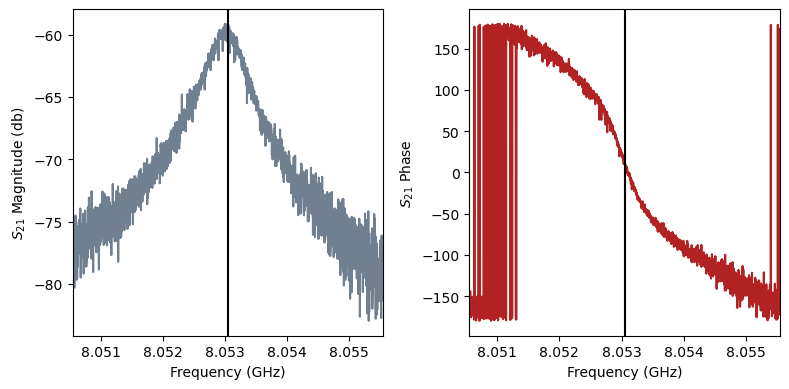

In [15]:
span = trans_settings['center']/1e9 + np.array([-2.5,2.5])*1e-3
marker = trans_settings['center']/1e9

plt.close()

fig, ax = plt.subplots(1,2,figsize=(8, 4));

ax1 = ax[0]
ax1.plot(freqs/1e9, mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Phase');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

plt.tight_layout()
plt.show()

### Qubit measurements

In [59]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2
spec_settings['start_freq'] = 3.2e9
spec_settings['stop_freq'] = 4.0e9
spec_settings['RFpower'] = -10
spec_settings['CAVfreq'] = 8.05305e9
spec_settings['CAVpower'] = -15
spec_settings['avg_time'] = 50
spec_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'


spec_settings

{'channel': 1,
 'avg_time': 50,
 'measurement': 'S21',
 'start_freq': 3200000000.0,
 'stop_freq': 4000000000.0,
 'freq_points': 1001,
 'RFpower': -10,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -15,
 'CAVfreq': 8053050000.0,
 'ifBW': 500,
 'mode': 'MOV'}

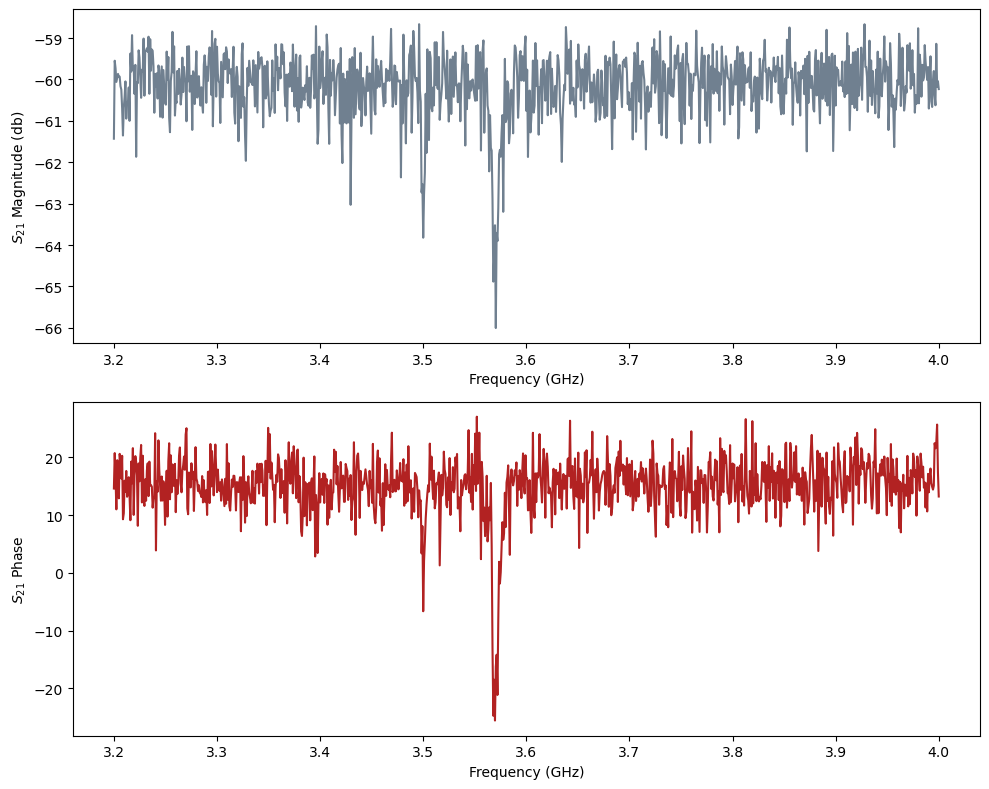

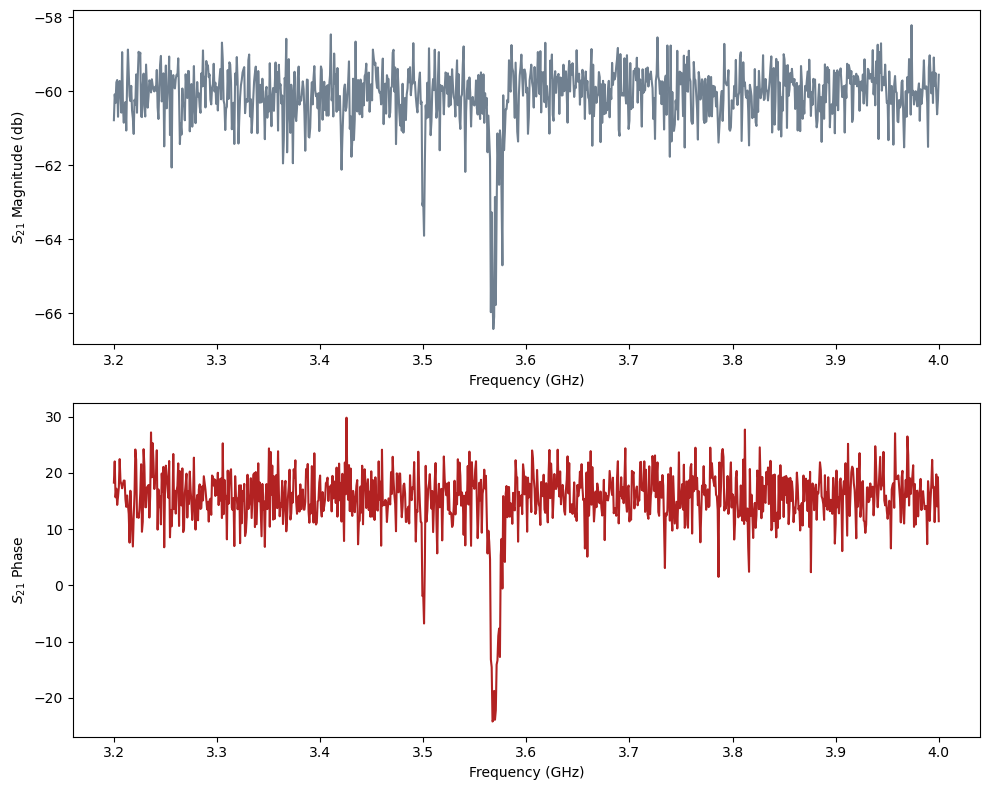

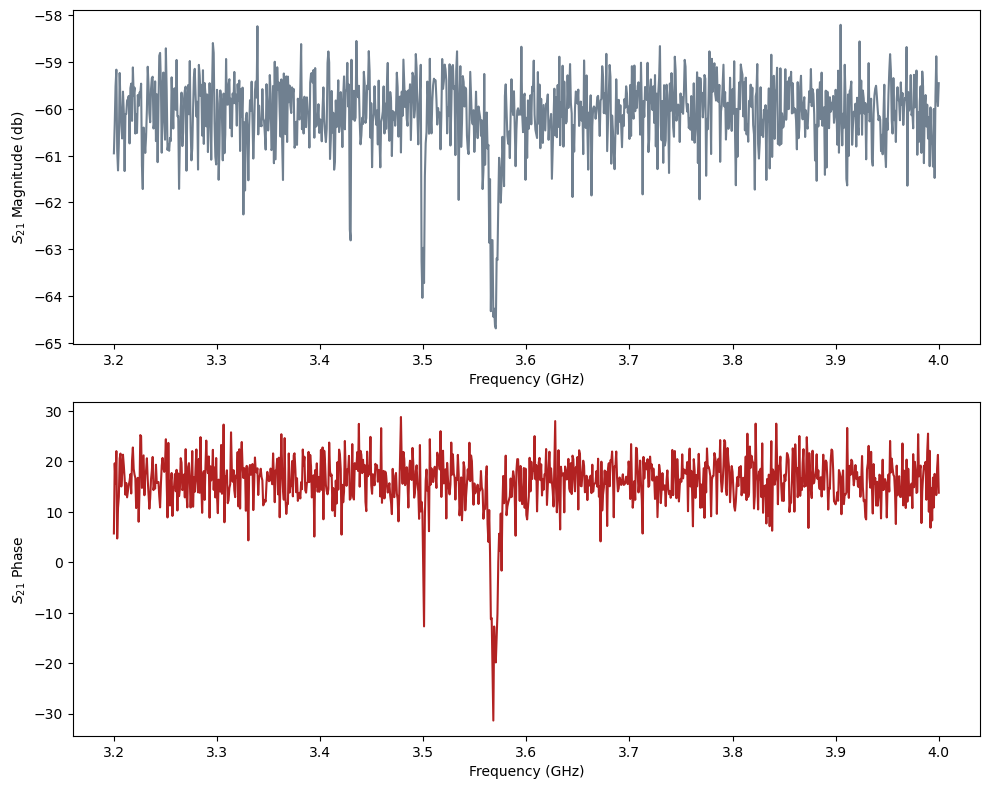

In [60]:
vary_pts = linspace(-0.001, 0.001, 3)
for flux_pts in vary_pts:
    dcflux.ramp_current(flux_pts, sweeprate=0.002)
    data = rs.spec_meas(spec_settings)

    freqs = np.fromstring(data['xaxis'], sep=',')
    mags = np.fromstring(data['mag'], sep=',')
    phases = np.fromstring(data['phase'], sep=',')

    span = np.array([spec_settings['start_freq'],spec_settings['stop_freq']])*1e-9
    marker1 = 3.57
    marker2 = 3.50

    fig, ax = plt.subplots(2,1,figsize=(10, 8))

    ax1 = ax[0]
    ax1.plot(freqs/1e9,mags, color = 'slategrey')
    ax1.set_xlabel('Frequency (GHz)')
    ax1.set_ylabel('$S_{21}$ Magnitude (db)')
    # ax1.set_xlim(span)
    # ax1.axvline(marker1 , color = 'k')
    # ax1.axvline(marker2 , color = 'g')

    ax1 = ax[1]
    ax1.plot(freqs/1e9,phases, color = 'firebrick')
    ax1.set_xlabel('Frequency (GHz)')
    ax1.set_ylabel('$S_{21}$ Phase')
    # ax1.set_xlim(span)
    # ax1.axvline(marker1 , color = 'k')
    # ax1.axvline(marker2 , color = 'g')

    plt.tight_layout()
    plt.show()

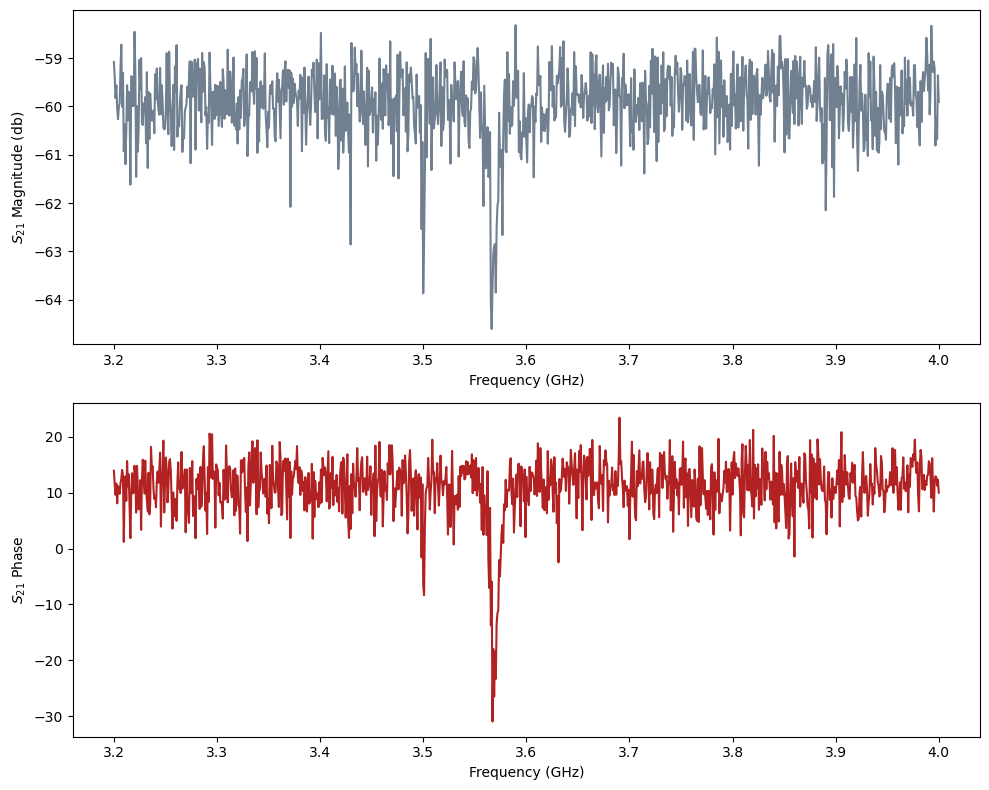

In [43]:
span = np.array([spec_settings['start_freq'],spec_settings['stop_freq']])*1e-9
marker1 = 3.57
marker2 = 3.50

fig, ax = plt.subplots(2,1,figsize=(10, 8))

ax1 = ax[0]
ax1.plot(freqs/1e9,mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Magnitude (db)')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Phase')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

plt.tight_layout()

<HDF5 group "/settings" (0 members)>


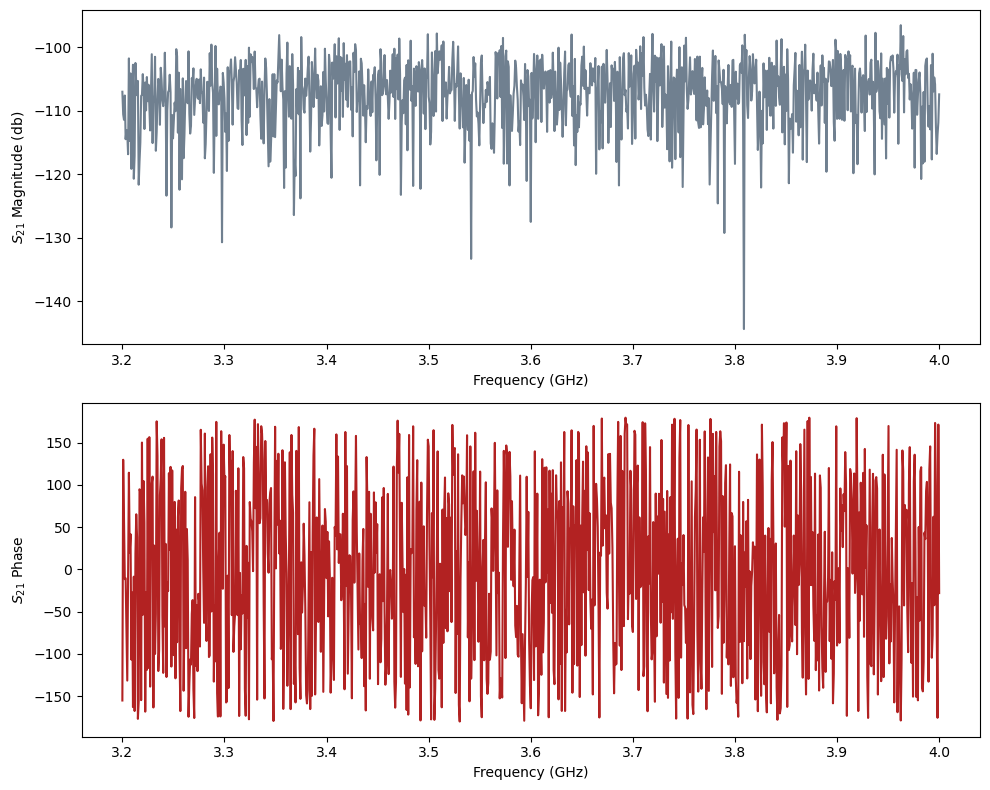

In [53]:
expt_name = 'RS_single_tone_flux_scan'
fname1 = "H:\\Shared drives\\multimode\\Multimode\\experiment\\231025\\231025_cooldown\\data\\" + str(6).zfill(5) + "_"+expt_name.lower()+".h5"

with SlabFile(fname1, 'r') as a:
    print(a['settings'])
    ppts = np.array(a['flux_pts'])*1e3 # Inner loop of the code
    freq = np.array(a['fpts'])[0]/1e9
    probe_pow = np.array(a['probe_power'])[0]
    data1 = np.array(a['mags'])
    data2 = np.array(a['phases'])

span = freq*1e-9
marker1 = 3.57
marker2 = 3.50

fig, ax = plt.subplots(2,1,figsize=(10, 8))

ax1 = ax[0]
ax1.plot(freqs/1e9,data1[0], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Magnitude (db)')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

ax1 = ax[1]
ax1.plot(freqs/1e9,data2[0], color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Phase')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

plt.tight_layout()

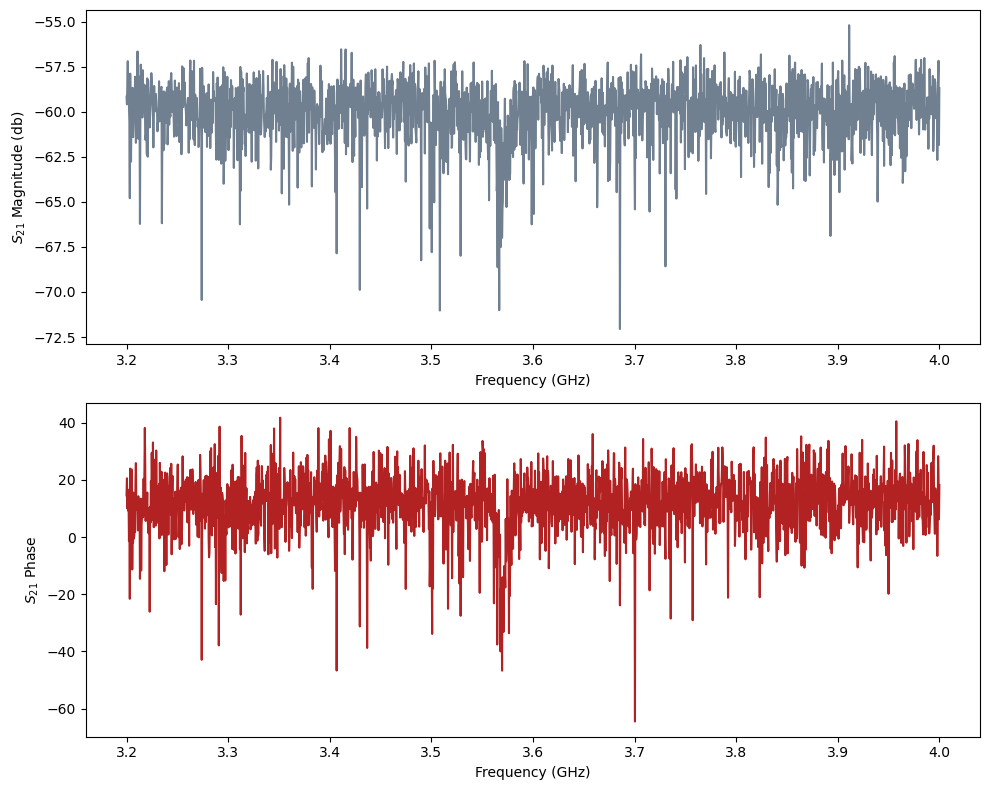

In [34]:
span = np.array([spec_settings['start_freq'],spec_settings['stop_freq']])*1e-9
marker1 = 3.57
marker2 = 3.50

fig, ax = plt.subplots(2,1,figsize=(10, 8))

ax1 = ax[0]
ax1.plot(freqs/1e9,mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Magnitude (db)')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Phase')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

plt.tight_layout()

# find coupler mode???

In [163]:
# rs = RhodeSchwarz(address='192.168.14.190')
rs = ZVB8(address='192.168.137.84', reset = True)

In [164]:
trans_settings = rs.trans_default_settings()
trans_settings['center'] = 6.0387825e9
trans_settings['bw'] = 20e3
trans_settings['start_freq'] = trans_settings['center']-trans_settings['bw']/2
trans_settings['stop_freq'] = trans_settings['center']+trans_settings['bw']/2
trans_settings['avg_time'] = 20
trans_settings['ifBW'] = 1e3
trans_settings['RFpower'] = -40
trans_settings['freq_points'] = 4001
trans_settings

{'channel': 1,
 'avg_time': 20,
 'measurement': 'S21',
 'start_freq': 6038772500.0,
 'stop_freq': 6038792500.0,
 'freq_points': 4001,
 'RFpower': -40,
 'ifBW': 1000.0,
 'mode': 'MOV',
 'center': 6038782500.0,
 'bw': 20000.0}

In [174]:
data = rs.trans_meas(trans_settings)

In [175]:
# data['mag']
freqs = np.fromstring(data['xaxis'], sep=',')
mags = np.fromstring(data['mag'], sep=',')
phases = np.fromstring(data['phase'], sep=',')
# freqs

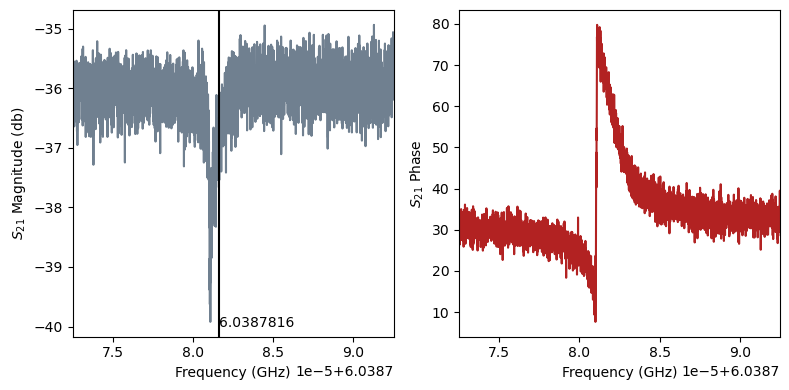

In [176]:
span = trans_settings['center']/1e9 + np.array([-trans_settings['bw']/2,trans_settings['bw']/2])/1e9
marker = 6.0387816

plt.close()

fig, ax = plt.subplots(1,2,figsize=(8, 4));

ax1 = ax[0]
ax1.plot(freqs/1e9, mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')
ax1.annotate(str(marker), (marker, -40))

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Phase');
ax1.set_xlim(span)
# ax1.axvline(marker , color = 'k')


plt.tight_layout()
plt.show()

In [189]:
# High high power

## High high power

In [190]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2
spec_settings['start_freq'] = 5.0e9
spec_settings['stop_freq'] = 6.0e9
spec_settings['RFpower'] = 5
spec_settings['CAVfreq'] = 6.0387816e9
spec_settings['CAVpower'] = -40
spec_settings['avg_time'] = 100
spec_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'


spec_settings

{'channel': 1,
 'avg_time': 100,
 'measurement': 'S21',
 'start_freq': 5000000000.0,
 'stop_freq': 6000000000.0,
 'freq_points': 1001,
 'RFpower': 5,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -40,
 'CAVfreq': 6038781600.0,
 'ifBW': 500,
 'mode': 'MOV'}

In [191]:
data = rs.spec_meas(spec_settings)

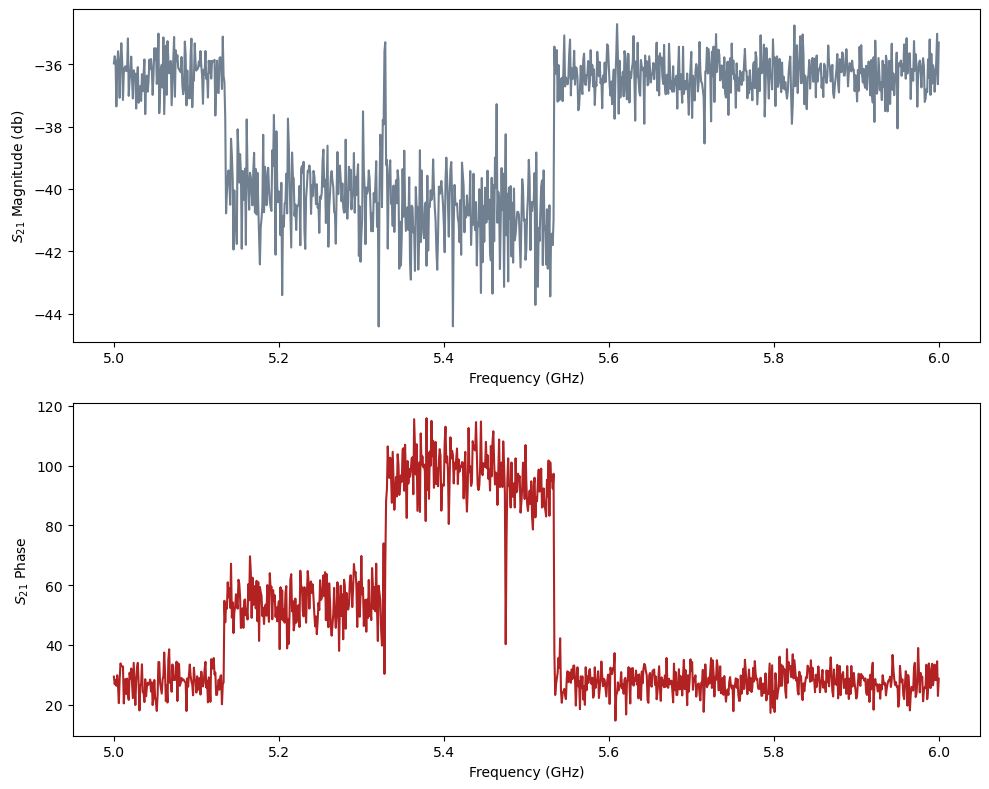

In [192]:


freqs = np.fromstring(data['xaxis'], sep=',')
mags = np.fromstring(data['mag'], sep=',')
phases = np.fromstring(data['phase'], sep=',')

span = np.array([spec_settings['start_freq'],spec_settings['stop_freq']])*1e-9
marker1 = 5.33
marker2 = 3.50

fig, ax = plt.subplots(2,1,figsize=(10, 8))

ax1 = ax[0]
ax1.plot(freqs/1e9,mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Magnitude (db)')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Phase')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

plt.tight_layout()
plt.show()

## high power

In [157]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2
spec_settings['start_freq'] = 5.0e9
spec_settings['stop_freq'] = 6.0e9
spec_settings['RFpower'] = 0
spec_settings['CAVfreq'] = 6.0387825e9
spec_settings['CAVpower'] = -40
spec_settings['avg_time'] = 100
spec_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'


spec_settings

{'channel': 1,
 'avg_time': 100,
 'measurement': 'S21',
 'start_freq': 5000000000.0,
 'stop_freq': 6000000000.0,
 'freq_points': 1001,
 'RFpower': 0,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -40,
 'CAVfreq': 6038782500.0,
 'ifBW': 500,
 'mode': 'MOV'}

In [158]:
data = rs.spec_meas(spec_settings)

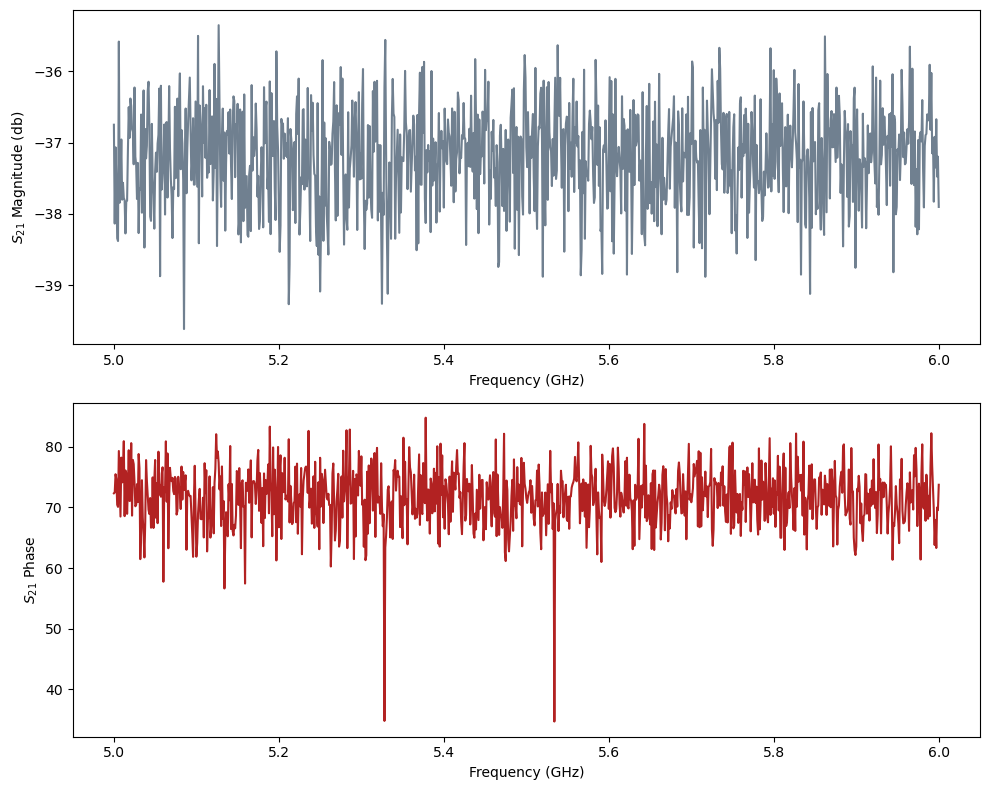

In [159]:



freqs = np.fromstring(data['xaxis'], sep=',')
mags = np.fromstring(data['mag'], sep=',')
phases = np.fromstring(data['phase'], sep=',')

span = np.array([spec_settings['start_freq'],spec_settings['stop_freq']])*1e-9
marker1 = 5.33
marker2 = 3.50

fig, ax = plt.subplots(2,1,figsize=(10, 8))

ax1 = ax[0]
ax1.plot(freqs/1e9,mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Magnitude (db)')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Phase')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

plt.tight_layout()
plt.show()

## low power

In [183]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2
spec_settings['start_freq'] = 5.0e9
spec_settings['stop_freq'] = 6.0e9
spec_settings['RFpower'] = -10
spec_settings['CAVfreq'] = 6.0387816e9
spec_settings['CAVpower'] = -40
spec_settings['avg_time'] = 100
spec_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'


spec_settings

{'channel': 1,
 'avg_time': 100,
 'measurement': 'S21',
 'start_freq': 5000000000.0,
 'stop_freq': 6000000000.0,
 'freq_points': 1001,
 'RFpower': -10,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -40,
 'CAVfreq': 6038781600.0,
 'ifBW': 500,
 'mode': 'MOV'}

In [184]:
data1 = rs.spec_meas(spec_settings)

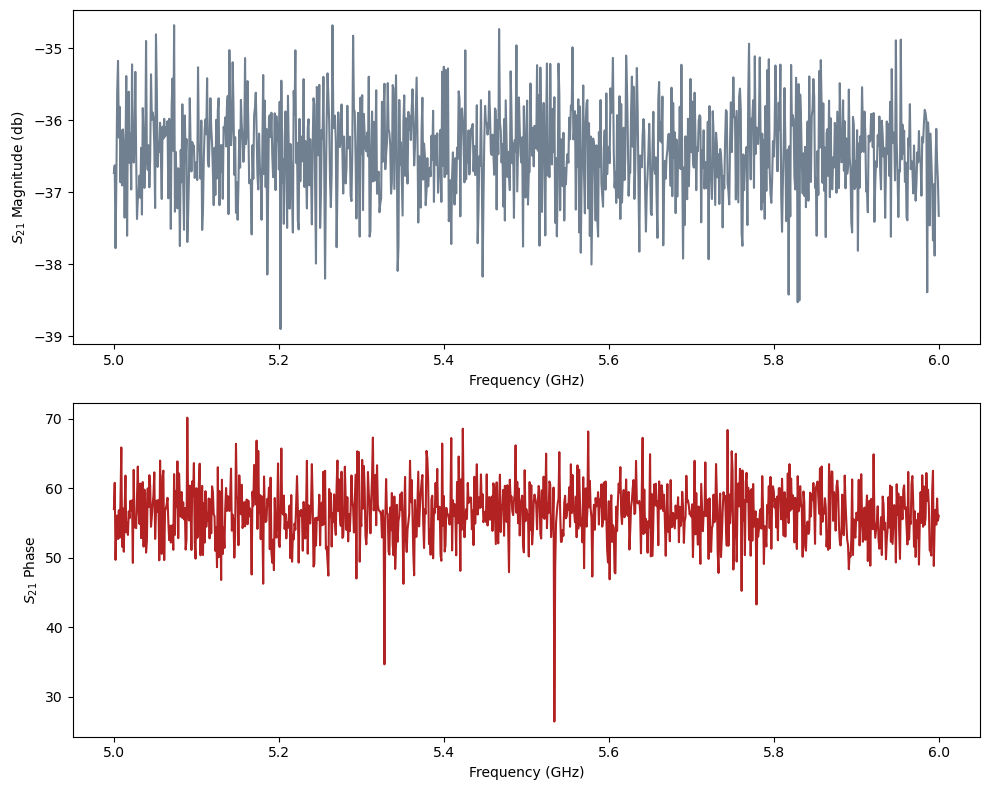

In [185]:



freqs = np.fromstring(data1['xaxis'], sep=',')
mags = np.fromstring(data1['mag'], sep=',')
phases = np.fromstring(data1['phase'], sep=',')

span = np.array([spec_settings['start_freq'],spec_settings['stop_freq']])*1e-9
marker1 = 5.33
marker2 = 3.50

fig, ax = plt.subplots(2,1,figsize=(10, 8))

ax1 = ax[0]
ax1.plot(freqs/1e9,mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Magnitude (db)')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Phase')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

plt.tight_layout()
plt.show()

In [180]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2
spec_settings['start_freq'] = 5.0e9
spec_settings['stop_freq'] = 6.0e9
spec_settings['RFpower'] = -15
spec_settings['CAVfreq'] = 6.0387816e9
spec_settings['CAVpower'] = -40
spec_settings['avg_time'] = 100
spec_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'


spec_settings

{'channel': 1,
 'avg_time': 100,
 'measurement': 'S21',
 'start_freq': 5000000000.0,
 'stop_freq': 6000000000.0,
 'freq_points': 1001,
 'RFpower': -15,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -40,
 'CAVfreq': 6038781600.0,
 'ifBW': 500,
 'mode': 'MOV'}

In [181]:
data3 = rs.spec_meas(spec_settings)

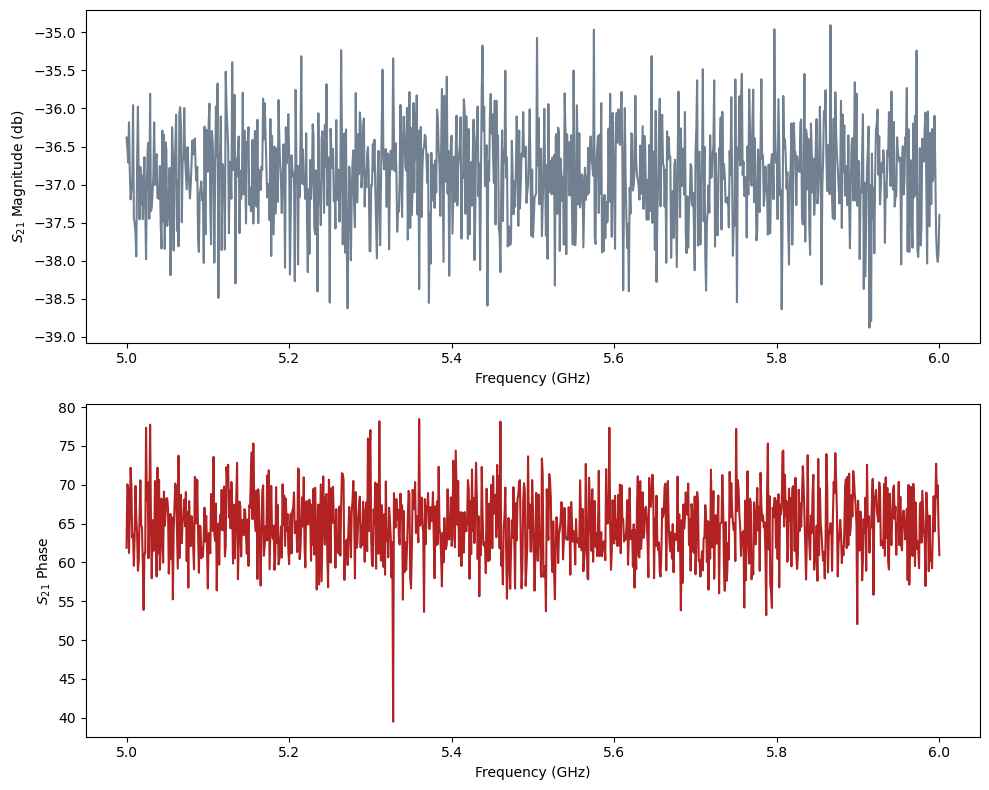

In [182]:



freqs = np.fromstring(data3['xaxis'], sep=',')
mags = np.fromstring(data3['mag'], sep=',')
phases = np.fromstring(data3['phase'], sep=',')

span = np.array([spec_settings['start_freq'],spec_settings['stop_freq']])*1e-9
marker1 = 5.33
marker2 = 3.50

fig, ax = plt.subplots(2,1,figsize=(10, 8))

ax1 = ax[0]
ax1.plot(freqs/1e9,mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Magnitude (db)')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Phase')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

plt.tight_layout()
plt.show()

In [186]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2
spec_settings['start_freq'] = 5.0e9
spec_settings['stop_freq'] = 6.0e9
spec_settings['RFpower'] = -20
spec_settings['CAVfreq'] = 6.0387816e9
spec_settings['CAVpower'] = -40
spec_settings['avg_time'] = 300
spec_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'


spec_settings

{'channel': 1,
 'avg_time': 300,
 'measurement': 'S21',
 'start_freq': 5000000000.0,
 'stop_freq': 6000000000.0,
 'freq_points': 1001,
 'RFpower': -20,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -40,
 'CAVfreq': 6038781600.0,
 'ifBW': 500,
 'mode': 'MOV'}

In [187]:
data2 = rs.spec_meas(spec_settings)

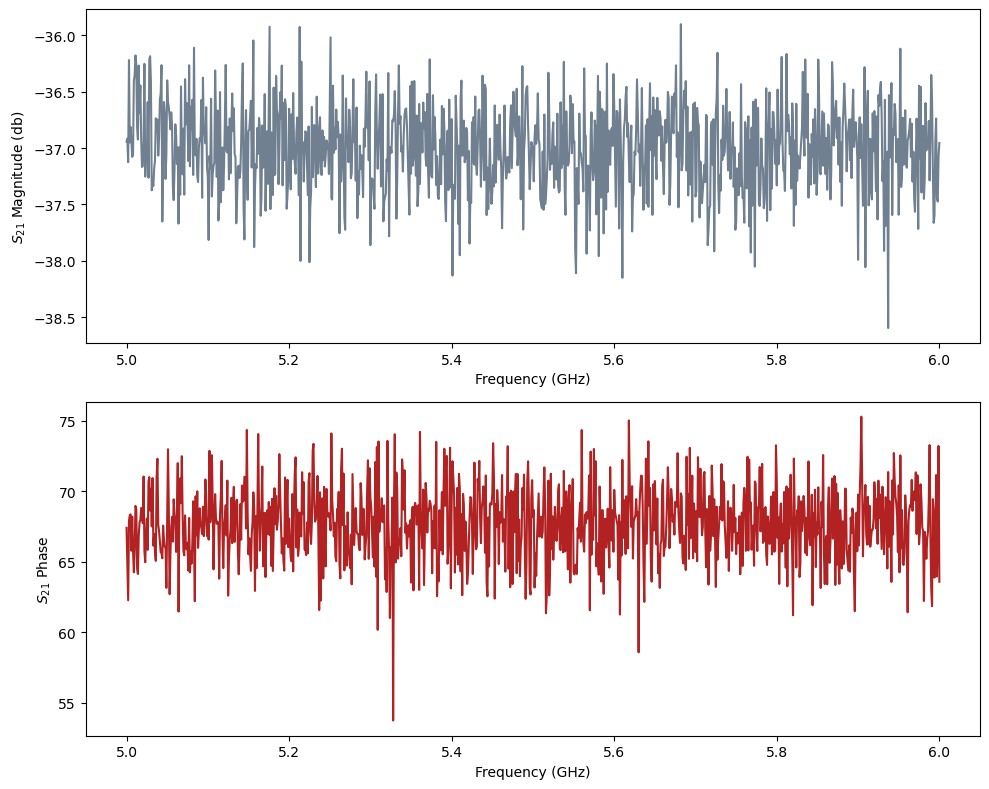

In [188]:



freqs = np.fromstring(data2['xaxis'], sep=',')
mags = np.fromstring(data2['mag'], sep=',')
phases = np.fromstring(data2['phase'], sep=',')

span = np.array([spec_settings['start_freq'],spec_settings['stop_freq']])*1e-9
marker1 = 5.33
marker2 = 3.50

fig, ax = plt.subplots(2,1,figsize=(10, 8))

ax1 = ax[0]
ax1.plot(freqs/1e9,mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Magnitude (db)')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Phase')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

plt.tight_layout()
plt.show()

# check with another storage mode

In [293]:
# rs = RhodeSchwarz(address='192.168.14.190')
rs = ZVB8(address='192.168.137.84',  reset = True)

In [232]:
trans_settings = rs.trans_default_settings()
trans_settings['center'] = 5.86343e9
trans_settings['bw'] = 20e3
trans_settings['start_freq'] = trans_settings['center']-trans_settings['bw']/2
trans_settings['stop_freq'] = trans_settings['center']+trans_settings['bw']/2
trans_settings['avg_time'] = 30
trans_settings['ifBW'] = 1e3
trans_settings['RFpower'] = -35
trans_settings['freq_points'] = 4001
trans_settings

{'channel': 1,
 'avg_time': 30,
 'measurement': 'S21',
 'start_freq': 5863420000.0,
 'stop_freq': 5863440000.0,
 'freq_points': 4001,
 'RFpower': -35,
 'ifBW': 1000.0,
 'mode': 'MOV',
 'center': 5863430000.0,
 'bw': 20000.0}

In [233]:
data_storage2 = rs.trans_meas(trans_settings)

In [234]:
# data['mag']
freqs = np.fromstring(data_storage2['xaxis'], sep=',')
mags = np.fromstring(data_storage2['mag'], sep=',')
phases = np.fromstring(data_storage2['phase'], sep=',')
# freqs

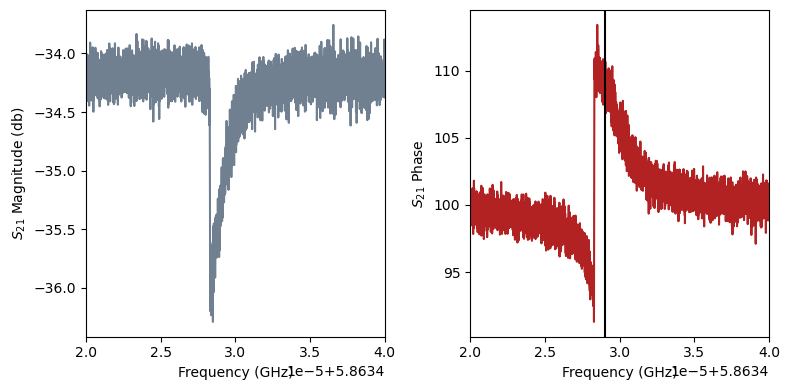

In [239]:
span = trans_settings['center']/1e9 + np.array([-trans_settings['bw']/2,trans_settings['bw']/2])/1e9
marker = 5.863429

plt.close()

fig, ax = plt.subplots(1,2,figsize=(8, 4));

ax1 = ax[0]
ax1.plot(freqs/1e9, mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
#ax1.axvline(marker , color = 'k')
#ax1.annotate(str(marker), (marker, -40))

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Phase');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')


plt.tight_layout()
plt.show()

## -10 dbm power

In [240]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2
spec_settings['start_freq'] = 5.0e9
spec_settings['stop_freq'] = 6.0e9
spec_settings['RFpower'] = -10
spec_settings['CAVfreq'] = 5.863429e9
spec_settings['CAVpower'] = -35
spec_settings['avg_time'] = 100
spec_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'


spec_settings

{'channel': 1,
 'avg_time': 100,
 'measurement': 'S21',
 'start_freq': 5000000000.0,
 'stop_freq': 6000000000.0,
 'freq_points': 1001,
 'RFpower': -10,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -35,
 'CAVfreq': 5863429000.0,
 'ifBW': 500,
 'mode': 'MOV'}

In [241]:
datan_storage2_n10 = rs.spec_meas(spec_settings)

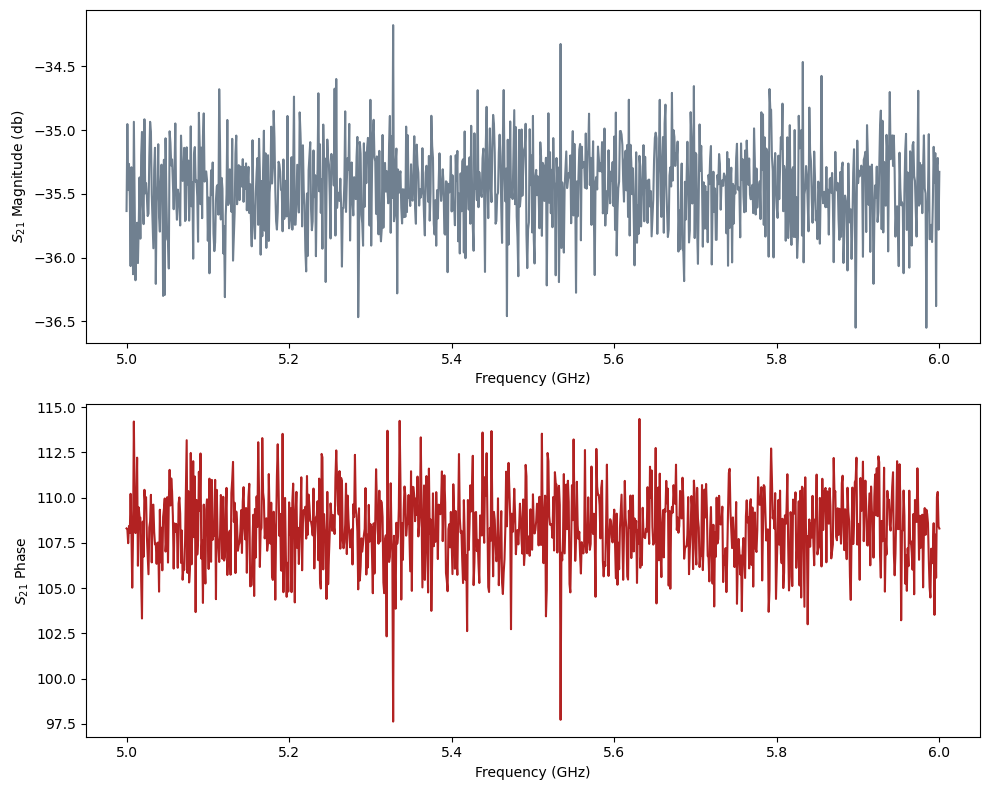

In [242]:



freqs = np.fromstring(datan_storage2_n10['xaxis'], sep=',')
mags = np.fromstring(datan_storage2_n10['mag'], sep=',')
phases = np.fromstring(datan_storage2_n10['phase'], sep=',')

span = np.array([spec_settings['start_freq'],spec_settings['stop_freq']])*1e-9
marker1 = 5.33
marker2 = 3.50

fig, ax = plt.subplots(2,1,figsize=(10, 8))

ax1 = ax[0]
ax1.plot(freqs/1e9,mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Magnitude (db)')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Phase')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

plt.tight_layout()
plt.show()

## 0dbm power

In [243]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2
spec_settings['start_freq'] = 5.0e9
spec_settings['stop_freq'] = 6.0e9
spec_settings['RFpower'] = 0
spec_settings['CAVfreq'] = 5.863429e9
spec_settings['CAVpower'] = -35
spec_settings['avg_time'] = 100
spec_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'


spec_settings

{'channel': 1,
 'avg_time': 100,
 'measurement': 'S21',
 'start_freq': 5000000000.0,
 'stop_freq': 6000000000.0,
 'freq_points': 1001,
 'RFpower': 0,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -35,
 'CAVfreq': 5863429000.0,
 'ifBW': 500,
 'mode': 'MOV'}

In [244]:
datan_storage2_0 = rs.spec_meas(spec_settings)

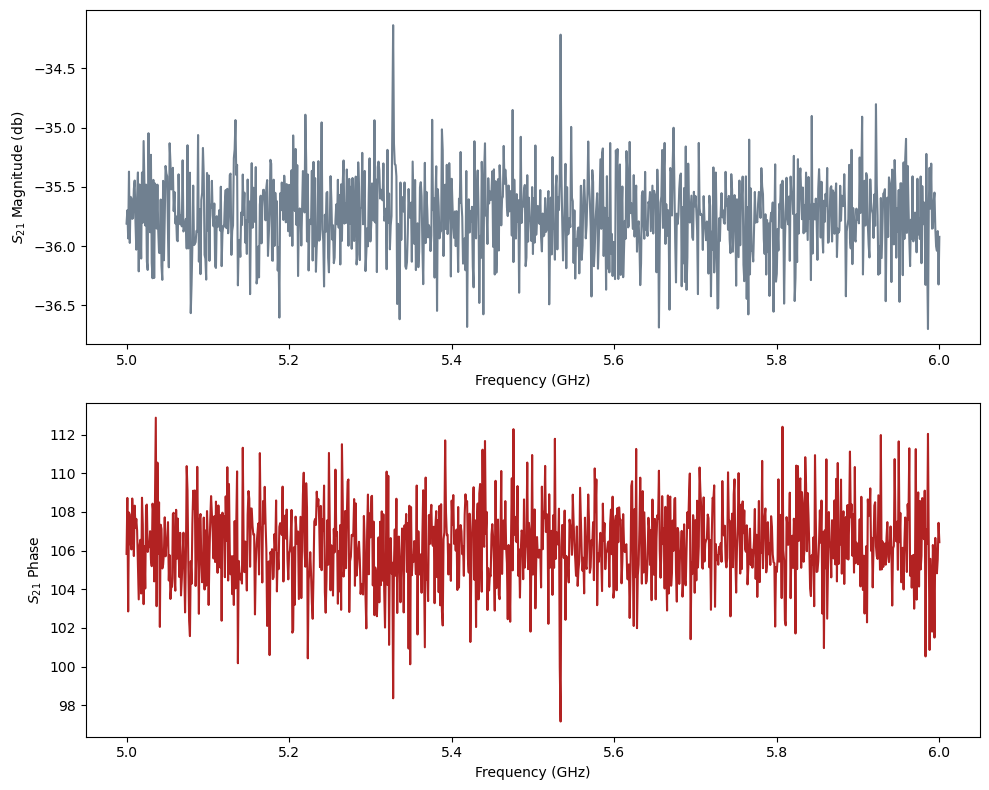

In [245]:



freqs = np.fromstring(datan_storage2_0['xaxis'], sep=',')
mags = np.fromstring(datan_storage2_0['mag'], sep=',')
phases = np.fromstring(datan_storage2_0['phase'], sep=',')

span = np.array([spec_settings['start_freq'],spec_settings['stop_freq']])*1e-9
marker1 = 5.33
marker2 = 3.50

fig, ax = plt.subplots(2,1,figsize=(10, 8))

ax1 = ax[0]
ax1.plot(freqs/1e9,mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Magnitude (db)')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Phase')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

plt.tight_layout()
plt.show()

# check with third storage mode

In [246]:
# rs = RhodeSchwarz(address='192.168.14.190')
rs = ZVB8(address='192.168.137.84',  reset = True)

In [294]:
trans_settings = rs.trans_default_settings()
trans_settings['center'] = 6.58915e9
trans_settings['bw'] = 20e3
trans_settings['start_freq'] = trans_settings['center']-trans_settings['bw']/2
trans_settings['stop_freq'] = trans_settings['center']+trans_settings['bw']/2
trans_settings['avg_time'] = 10
trans_settings['ifBW'] = 1e3
trans_settings['RFpower'] = -60
trans_settings['freq_points'] = 1001
trans_settings

{'channel': 1,
 'avg_time': 10,
 'measurement': 'S21',
 'start_freq': 6589140000.0,
 'stop_freq': 6589160000.0,
 'freq_points': 1001,
 'RFpower': -60,
 'ifBW': 1000.0,
 'mode': 'MOV',
 'center': 6589150000.0,
 'bw': 20000.0}

In [295]:
data_storage23 = rs.trans_meas(trans_settings)

In [272]:
trans_settings = rs.trans_default_settings()
trans_settings['center'] = 6.58915e9
trans_settings['bw'] = 20e3
trans_settings['start_freq'] = trans_settings['center']-trans_settings['bw']/2
trans_settings['stop_freq'] = trans_settings['center']+trans_settings['bw']/2
trans_settings['avg_time'] = 30
trans_settings['ifBW'] = 1e3
trans_settings['RFpower'] = -40
trans_settings['freq_points'] = 5001
trans_settings

{'channel': 1,
 'avg_time': 30,
 'measurement': 'S21',
 'start_freq': 6589140000.0,
 'stop_freq': 6589160000.0,
 'freq_points': 5001,
 'RFpower': -40,
 'ifBW': 1000.0,
 'mode': 'MOV',
 'center': 6589150000.0,
 'bw': 20000.0}

In [273]:
data_storage3 = rs.trans_meas(trans_settings)

In [274]:
# data['mag']
freqs = np.fromstring(data_storage3['xaxis'], sep=',')
mags = np.fromstring(data_storage3['mag'], sep=',')
phases = np.fromstring(data_storage3['phase'], sep=',')

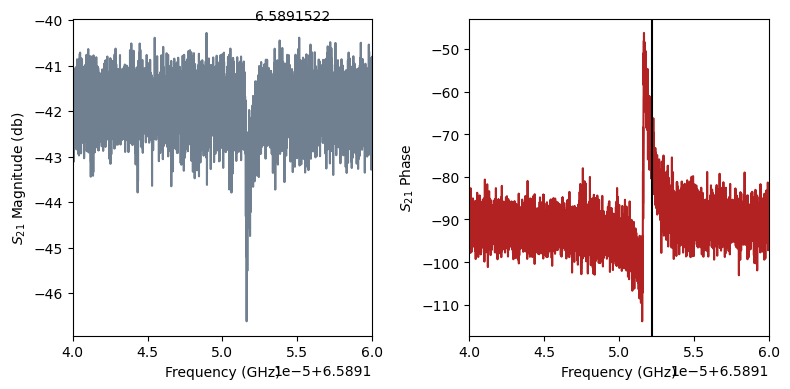

In [282]:
span = trans_settings['center']/1e9 + np.array([-trans_settings['bw']/2,trans_settings['bw']/2])/1e9
marker = 6.5891522

plt.close()

fig, ax = plt.subplots(1,2,figsize=(8, 4));

ax1 = ax[0]
ax1.plot(freqs/1e9, mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
#ax1.axvline(marker , color = 'k')
ax1.annotate(str(marker), (marker, -40))
#ax1.axvline(marker , color = 'k')


ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Phase');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')


plt.tight_layout()
plt.show()

In [ ]:
## -10 dbm power

## -10 dbm power

In [289]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2
spec_settings['start_freq'] = 5.0e9
spec_settings['stop_freq'] = 6.0e9
spec_settings['RFpower'] = 0
spec_settings['CAVfreq'] = 6.5891522e9
spec_settings['CAVpower'] = -40
spec_settings['avg_time'] = 100
spec_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'


spec_settings

{'channel': 1,
 'avg_time': 100,
 'measurement': 'S21',
 'start_freq': 5000000000.0,
 'stop_freq': 6000000000.0,
 'freq_points': 1001,
 'RFpower': 0,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -40,
 'CAVfreq': 6589152200.0,
 'ifBW': 500,
 'mode': 'MOV'}

In [290]:
datan_storage3_n10 = rs.spec_meas(spec_settings)

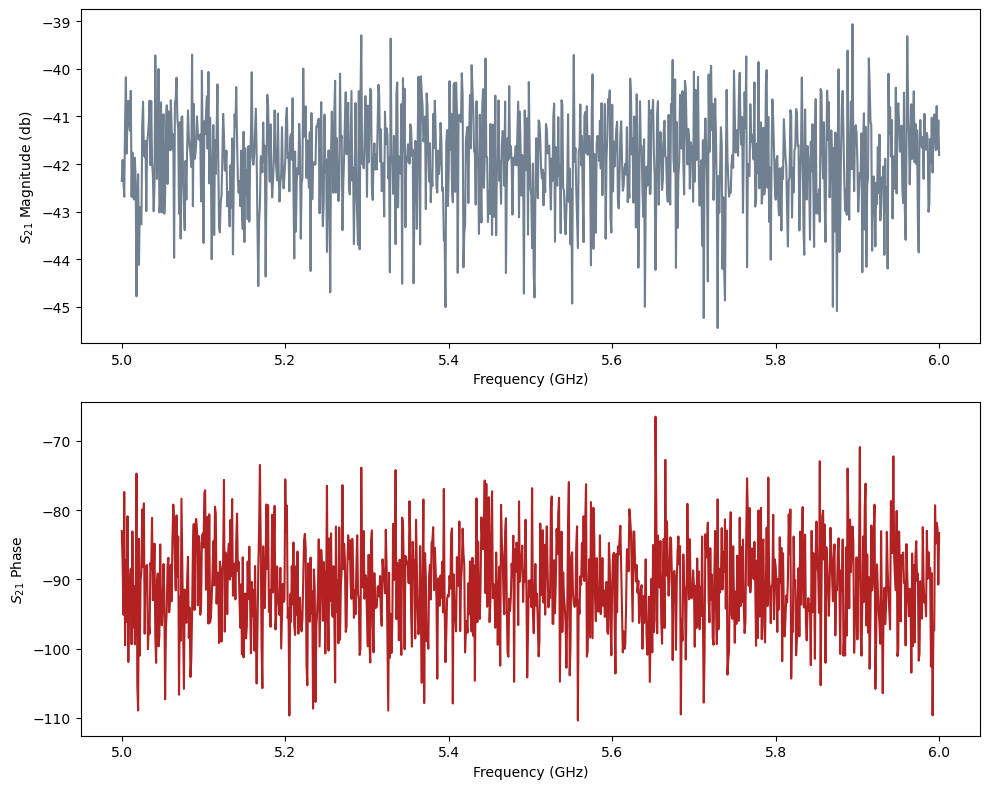

In [292]:



freqs = np.fromstring(datan_storage3_n10['xaxis'], sep=',')
mags = np.fromstring(datan_storage3_n10['mag'], sep=',')
phases = np.fromstring(datan_storage3_n10['phase'], sep=',')

span = np.array([spec_settings['start_freq'],spec_settings['stop_freq']])*1e-9
# marker1 = 5.33
# marker2 = 3.50

fig, ax = plt.subplots(2,1,figsize=(10, 8))

ax1 = ax[0]
ax1.plot(freqs/1e9,mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Magnitude (db)')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)')
ax1.set_ylabel('$S_{21}$ Phase')
# ax1.set_xlim(span)
# ax1.axvline(marker1 , color = 'k')
# ax1.axvline(marker2 , color = 'g')

plt.tight_layout()
plt.show()

# Manipulate cavity

In [105]:
trans_settings = rs.trans_default_settings()
trans_settings['center'] = 5.37e9
trans_settings['bw'] = 10e3
trans_settings['start_freq'] = trans_settings['center']-trans_settings['bw']/2
trans_settings['stop_freq'] = trans_settings['center']+trans_settings['bw']/2
trans_settings['avg_time'] = 10
trans_settings['ifBW'] = 500
trans_settings['RFpower'] = -25
trans_settings['freq_points'] = 2001
trans_settings

{'channel': 1,
 'avg_time': 10,
 'measurement': 'S21',
 'start_freq': 5369995000.0,
 'stop_freq': 5370005000.0,
 'freq_points': 2001,
 'RFpower': -25,
 'ifBW': 500,
 'mode': 'MOV',
 'center': 5370000000.0,
 'bw': 10000.0}

In [106]:
data = rs.trans_meas(trans_settings)
# data['mag']
freqs = np.fromstring(data['xaxis'], sep=',')
mags = np.fromstring(data['mag'], sep=',')
phases = np.fromstring(data['phase'], sep=',')
# freqs

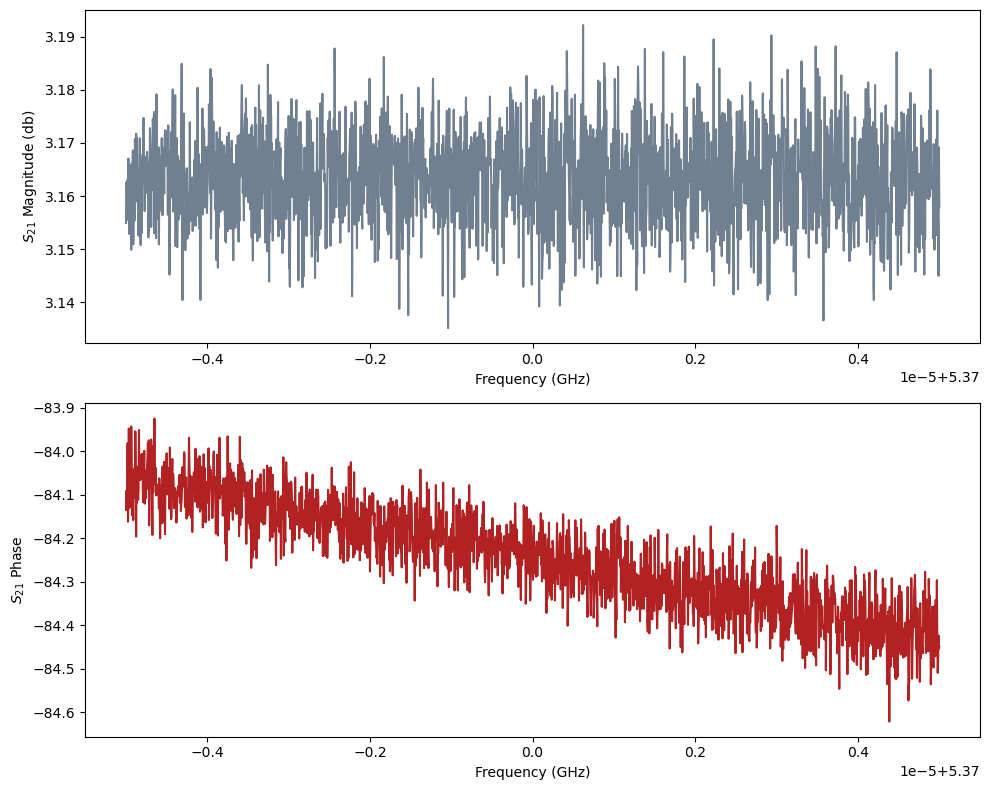

In [107]:
span = trans_settings['center']/1e9 + np.array([-2.5,2.5])*1e-3
marker = trans_settings['center']/1e9

plt.close()

fig, ax = plt.subplots(2,1,figsize=(10, 8));

ax1 = ax[0]
ax1.plot(freqs/1e9, mags, color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
# ax1.set_xlim(span)
# ax1.axvline(marker , color = 'k')

ax1 = ax[1]
ax1.plot(freqs/1e9,phases, color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Phase');
# ax1.set_xlim(span)
# ax1.axvline(marker , color = 'k')

plt.tight_layout()
plt.show()

## Flux sweep qubit spectroscopy


In [4]:

from slab import *
from slab.datamanagement import SlabFile
from numpy import *
import os

from slab.instruments import InstrumentManager
from slab.instruments import *
from slab.instruments import InstrumentManager

im = InstrumentManager()

In [12]:
## All current is in unit amp !!!!!!!!
dcflux = YokogawaGS200(address="192.168.137.148")
dcflux.set_output(True)
dcflux.set_mode('current')
dcflux.ramp_current(0.000, sweeprate=0.002)
expt_path = r'H:\Shared drives\multimode\Multimode\experiment\231025\231025_cooldown' + '\\data'

In [65]:
# varied flux point
vary_pts = linspace(-0.002, 0.002, 61)  # in units of amp!!!!!!
# vary_pts = [0]


In [66]:
# Initial NWA configuration values
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2
spec_settings['start_freq'] = 3.4e9
spec_settings['stop_freq'] = 3.6e9
spec_settings['RFpower'] = -10
spec_settings['CAVfreq'] = 8.05305e9
spec_settings['CAVpower'] = -15
spec_settings['avg_time'] = 20
spec_settings['freq_points'] = 801
spec_settings['measurement'] = 'S21'
spec_settings['ifBW'] = 500
print(spec_settings)

dcflux.set_output(True)
dcflux.set_mode('current')
start_id = 0
read_freq = spec_settings['CAVfreq']
prefix = "RS_single_tone_flux_scan"
fname = get_next_filename(expt_path, prefix, suffix='.h5')
print(fname)
fname = os.path.join(expt_path, fname)

# lp.clear()-
with SlabFile(fname, 'w') as f:
    # print(rs.spec_default_settings())

    f.save_settings(spec_settings)

for ii, pt in enumerate(vary_pts[start_id:]):
    print(spec_settings)
    print("%d: flux Driving at %.3f mA" % (ii, pt * 1000))
    dcflux.ramp_current(pt, sweeprate=0.002)
    time.sleep(0.2)

    print("Setting Read Frequency to %.5f GHz" % (read_freq / 1e9))
    data = rs.spec_meas(spec_settings)

    freqs = np.fromstring(data['xaxis'], sep=',')
    mags = np.fromstring(data['mag'], sep=',')
    phases = np.fromstring(data['phase'], sep=',')

    print("finished downloading")

    with SlabFile(fname, 'a') as f:
        f.append_pt(('flux_pts'), pt) # Flux
        f.append_line('fpts', freqs)
        f.append_line('mags', mags)
        f.append_line('phases', phases)
        f.append_pt('read_freq',read_freq)
        f.append_pt('read_power', spec_settings['CAVpower'])
        f.append_pt('probe_power', spec_settings['RFpower'])


    print(fname)
    
dcflux.ramp_current(0.0, sweeprate=0.002)
spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2
spec_settings['start_freq'] = 3.2e9
spec_settings['stop_freq'] = 4.0e9
spec_settings['RFpower'] = -50
spec_settings['CAVfreq'] = 8.05305e9
spec_settings['CAVpower'] = -50
spec_settings['avg_time'] = 1
spec_settings['freq_points'] = 2001
spec_settings['measurement'] = 'S21'
spec_settings['ifBW'] = 500
data = rs.trans_meas(spec_settings)
    

{'channel': 1, 'avg_time': 20, 'measurement': 'S21', 'start_freq': 3400000000.0, 'stop_freq': 3600000000.0, 'freq_points': 801, 'RFpower': -10, 'RFport': 3, 'Mport': 2, 'CAVport': 1, 'CAVpower': -15, 'CAVfreq': 8053050000.0, 'ifBW': 500, 'mode': 'MOV'}
00009_RS_single_tone_flux_scan.h5
{'channel': 1, 'avg_time': 20, 'measurement': 'S21', 'start_freq': 3400000000.0, 'stop_freq': 3600000000.0, 'freq_points': 801, 'RFpower': -10, 'RFport': 3, 'Mport': 2, 'CAVport': 1, 'CAVpower': -15, 'CAVfreq': 8053050000.0, 'ifBW': 500, 'mode': 'MOV'}
0: flux Driving at -2.000 mA
Setting Read Frequency to 8.05305 GHz
finished downloading
H:\Shared drives\multimode\Multimode\experiment\231025\231025_cooldown\data\00009_RS_single_tone_flux_scan.h5
{'channel': 1, 'avg_time': 20, 'measurement': 'S21', 'start_freq': 3400000000.0, 'stop_freq': 3600000000.0, 'freq_points': 801, 'RFpower': -10, 'RFport': 3, 'Mport': 2, 'CAVport': 1, 'CAVpower': -15, 'CAVfreq': 8053050000.0, 'ifBW': 500, 'mode': 'MOV'}
1: flux D

KeyboardInterrupt: 

In [56]:
rs.get_settings()

{'name': 'BatMouse',
 'address': '192.168.137.84',
 'instrument_type': '',
 'protocol': 'socket'}